## The Anime Recommendation system
The Anime Recommendation system is one of the best projects as it includes a data set 
containing information regarding user preference from 73,516 users on 12,294 anime. 
Every user in the database will be able to add anime to the list and share ratings 
compiling a data set with those ratings. The anime recommendation system project helps 
in creating a system that produces efficient data based on the user viewing history and 
sharing rating.
Dataset:
https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database

# Content
### Anime.csv
| Column | Description |
|--------|-------------|
| anime_id | myanimelist.net's unique id identifying an anime |
| name | Full name of anime |
| genre | Comma-separated list of genres for this anime |
| type | Type of anime (movie, TV, OVA, etc.) |
| episodes | Number of episodes in this show (1 if movie) |
| rating | Average rating out of 10 for this anime |
| members | Number of community members that are in this anime's "group" |


### Rating.csv
| Column | Description |
|--------|-------------|
| user_id | Non-identifiable randomly generated user id |
| anime_id | The anime that this user has rated |
| rating | Rating out of 10 this user has assigned (-1 if the user watched it but didn't assign a rating) |


### **Things to put light on**
<li>The connection between Anime and rates is the anime id
<li>REMEMBER!! rating in anime data is the total rates have happened to this data, but rating in the second table is specific for some user , means by that user number 1 has rated with 5 for anime, and the same anime has about 59 rates and all of them about 9.38 rate

In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tkinter as tk
from tkinter import filedialog
sns.set_style("darkgrid")

In [13]:
root = tk.Tk()
root.withdraw() # hide the root window
file_path_of_anime = filedialog.askopenfilename() # show the file dialog box and wait for user selection

In [14]:
file_path_of_rating = filedialog.askopenfilename() # show the file dialog box and wait for user selection
print(file_path_of_anime,file_path_of_rating,sep="\n") # print the path of the selected file

C:/Users/umahm/OneDrive/Desktop/Projects Github/Data-Mining/anime.csv
C:/Users/umahm/OneDrive/Desktop/Projects Github/Data-Mining/rating.csv


In [15]:
def wrangle(path_rating, path_anime):
    rating = pd.read_csv(path_rating)
    anime = pd.read_csv(path_anime)
    # Print head values
    print("Head Values of Rating:")
    print(tabulate(rating.head(), headers='keys', tablefmt='fancy_grid'))
    print("\nHead Values of Anime:")
    print(anime.head())
    # Print info of data
    print("\nThe needed Info of Rating:")
    print(rating.info())
    print("\nThe needed Info of Anime:")
    print(anime.info())

    # Print statistical data
    print("\nStatistical data about Ratings:")
    print(tabulate(rating.describe().T, headers='keys', tablefmt='fancy_grid'))
    print("\nStatistical data about Anime:")
    print(tabulate(anime.describe().T, headers='keys', tablefmt='fancy_grid'))

    # Print nullity before cleaning
    print("\nNullity before cleaning in Rating:")
    print(tabulate(rating.isnull().sum().to_frame().T, headers='keys', tablefmt='fancy_grid'))
    print("\nNullity before cleaning in Anime:")
    print(tabulate(anime.isnull().sum().to_frame().T, headers='keys', tablefmt='fancy_grid'))

    # Drop null values
    rating = rating.dropna()
    anime = anime.dropna()

    # Print nullity after cleaning
    print("\nNullity after cleaning in Rating:")
    print(tabulate(rating.isnull().sum().to_frame().T, headers='keys', tablefmt='fancy_grid'))
    print("\nNullity after cleaning in Anime:")
    print(tabulate(anime.isnull().sum().to_frame().T, headers='keys', tablefmt='fancy_grid'))
    # Print duplications
    print(f"There are {rating[rating.duplicated()].shape[0]} duplicate rows in {rating.shape[0]} rows in rating dataset.")
    rating.drop_duplicates(inplace=True)
    print(f"There are now {rating[rating.duplicated()].shape[0]} duplicate rows after process of duplication in {rating.shape[0]} rows in rating dataset.")  
    print(f"There are {anime[anime.duplicated()].shape[0]} duplicate rows in {anime.shape[0]} rows in anime dataset.")
    anime.drop_duplicates(inplace=True)
    print(f"There are now {anime[anime.duplicated()].shape[0]} duplicate rows after process of duplication in {anime.shape[0]} rows in rating dataset.")  
    # Merge data frames
    Data = pd.merge(anime, rating, on="anime_id")
    Data = Data.rename(columns={"rating_x": "Total_Rating", "rating_y": "Rate_of_user"})
    
    # Droping People without rates ["-1 people"]
    condition = Data["Rate_of_user"]==-1
    Data = Data[~condition]
    return Data


In [16]:
Data = wrangle(path_rating=file_path_of_rating,path_anime=file_path_of_anime)
Data

Head Values of Rating:
╒════╤═══════════╤════════════╤══════════╕
│    │   user_id │   anime_id │   rating │
╞════╪═══════════╪════════════╪══════════╡
│  0 │         1 │         20 │       -1 │
├────┼───────────┼────────────┼──────────┤
│  1 │         1 │         24 │       -1 │
├────┼───────────┼────────────┼──────────┤
│  2 │         1 │         79 │       -1 │
├────┼───────────┼────────────┼──────────┤
│  3 │         1 │        226 │       -1 │
├────┼───────────┼────────────┼──────────┤
│  4 │         1 │        241 │       -1 │
╘════╧═══════════╧════════════╧══════════╛

Head Values of Anime:
   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Dram

,anime_id,name,genre,type,episodes,Total_Rating,members,user_id,Rate_of_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10
...,...,...,...,...,...,...,...,...,...
7813596,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211,58483,1
7813599,5543,Under World,Hentai,OVA,1,4.28,183,49503,4
7813600,5543,Under World,Hentai,OVA,1,4.28,183,58483,1
7813603,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219,49503,6


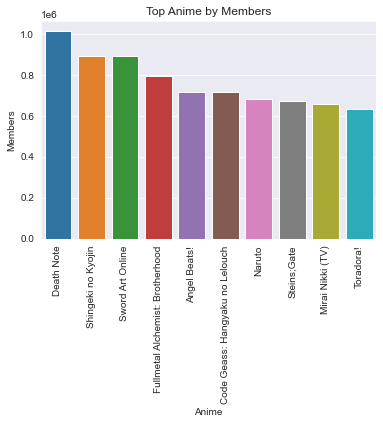

In [22]:
# Let's see top animes
top_animes = Data.drop_duplicates(subset="name",keep="first").sort_values("members",ascending=False)
sns.barplot(data=top_animes.head(10), x="name", y="members")
plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.xlabel('Anime')
plt.ylabel('Members')
plt.title('Top Anime by Members')
plt.show()

## From this draw, Death note was the most watched anime, then Attack on titan, and SAO
so will take their generes to know if people like same generies

In [ ]:
X_train, X_test= train_test_split(Data, test_size=0.3, random_state=42)